# The Sparks Foundation #GRIPFEB21
# Name : Poonam Gautam Deshmukh
# Topic : Prediction using UnSupervised ML

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

## Loading Iris Dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape

(150, 4)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

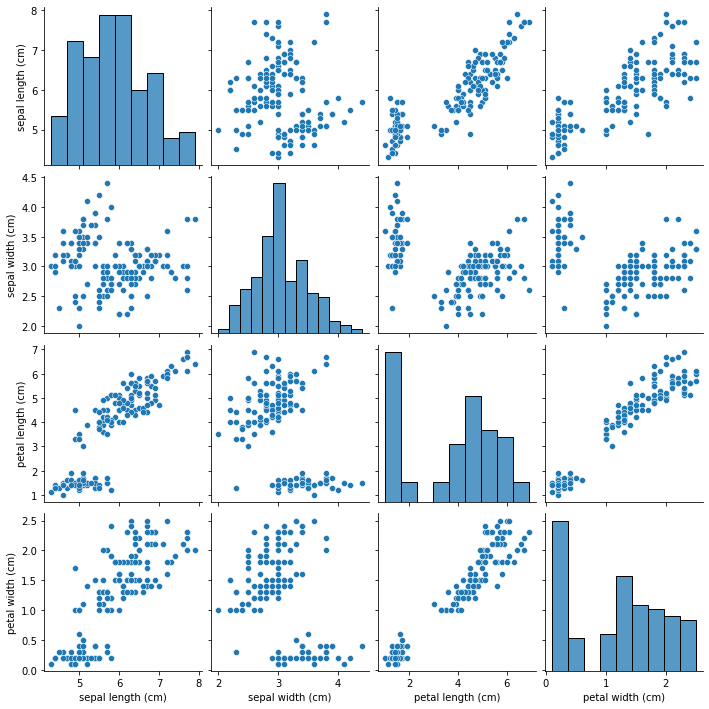

In [6]:
sns.pairplot(iris_df)
plt.show()

## Data Visualization

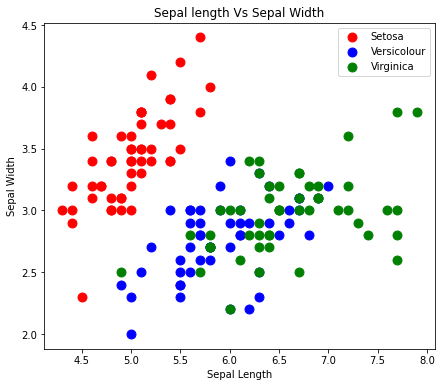

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
y = iris.target
plt.figure(figsize = (7,6))

plt.scatter(x[y == 0,0], x[y == 0,1], s = 80, c= "red", label = "Setosa")
plt.scatter(x[y == 1,0], x[y == 1,1], s = 80, c= "blue", label = "Versicolour")
plt.scatter(x[y == 2,0], x[y == 2,1], s = 80, c= "green", label = "Virginica")
plt.legend(loc = "best")
plt.title("Sepal length Vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [9]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

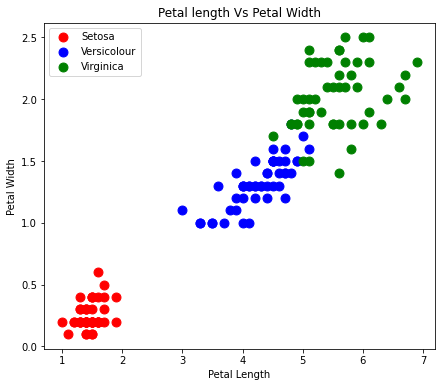

In [9]:
plt.figure(figsize = (7,6))
plt.scatter(x[y == 0,2], x[y == 0,3], s = 80, c= "red", label = "Setosa")
plt.scatter(x[y == 1,2], x[y == 1,3], s = 80, c= "blue", label = "Versicolour")
plt.scatter(x[y == 2,2], x[y == 2,3], s = 80, c= "green", label = "Virginica")
plt.legend(loc = "best")
plt.title("Petal length Vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

## Finding the optimum no. of clusters

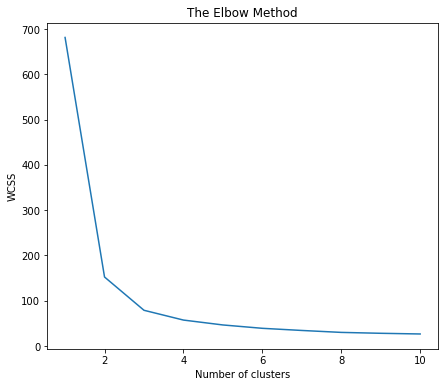

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #Calculating wcss which is within cluster sum of squares that helps us know the optimum no. of clusters

plt.figure(figsize = (7,6))    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K means 

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

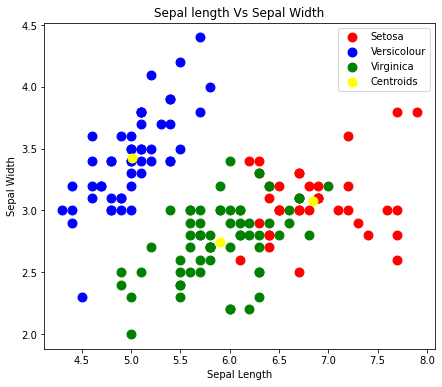

In [12]:
plt.figure(figsize = (7,6))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 80, c= "red", label = "Setosa")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 80, c= "blue", label = "Versicolour")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 80, c= "green", label = "Virginica")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 80, c = "yellow", label = "Centroids")
plt.legend(loc = "best")
plt.title("Sepal length Vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

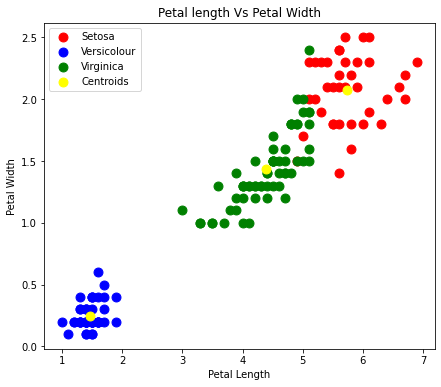

In [13]:
plt.figure(figsize = (7,6))
plt.scatter(x[y_kmeans == 0,2], x[y_kmeans == 0,3], s = 80, c= "red", label = "Setosa")
plt.scatter(x[y_kmeans == 1,2], x[y_kmeans == 1,3], s = 80, c= "blue", label = "Versicolour")
plt.scatter(x[y_kmeans == 2,2], x[y_kmeans == 2,3], s = 80, c= "green", label = "Virginica")

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 80, c = "yellow", label = "Centroids")
plt.legend(loc = "best")
plt.title("Petal length Vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Thank You